In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import cactas as C

In [3]:
import tensorflow as tf
gpu_available = tf.test.is_gpu_available()
gpu_available

2023-10-04 17:49:47.071249: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2023-10-04 17:49:49.851147: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-04 17:49:49.853949: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-10-04 17:49:50.421409: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:b7:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-10-04 17:49:50.425487: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:bd:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 3

True

In [4]:
DATAPATH='/raid/mpsych/CACTAS/DATA/ESUS'

In [5]:
images, labels = C.Helper.load_data(DATAPATH)

In [6]:
X_train, y_train, X_test, y_test = C.Helper.split_patients(images, labels)

In [7]:
X_train, y_train, X_test, y_test = C.Helper.normalization(DATAPATH, X_train, y_train, X_test, y_test)

In [8]:
slice_to_patient_mapping, last_key = C.Helper.map_and_key(y_train)

In [9]:
X_train, y_train, X_test, y_test = C.Helper.extract_slices(X_train, y_train, X_test, y_test)

(13422, 512, 512, 1) (13422, 512, 512, 1) (3344, 512, 512, 1) (3344, 512, 512, 1)


In [11]:
X_train, y_train = C.Helper.filter_slices(X_train, y_train)

(609, 512, 512, 1) (609, 512, 512, 1)


In [12]:
X_train_set = X_train[:last_key]
y_train_set = y_train[:last_key]
X_val = X_train[last_key:]
y_val = y_train[last_key:]

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


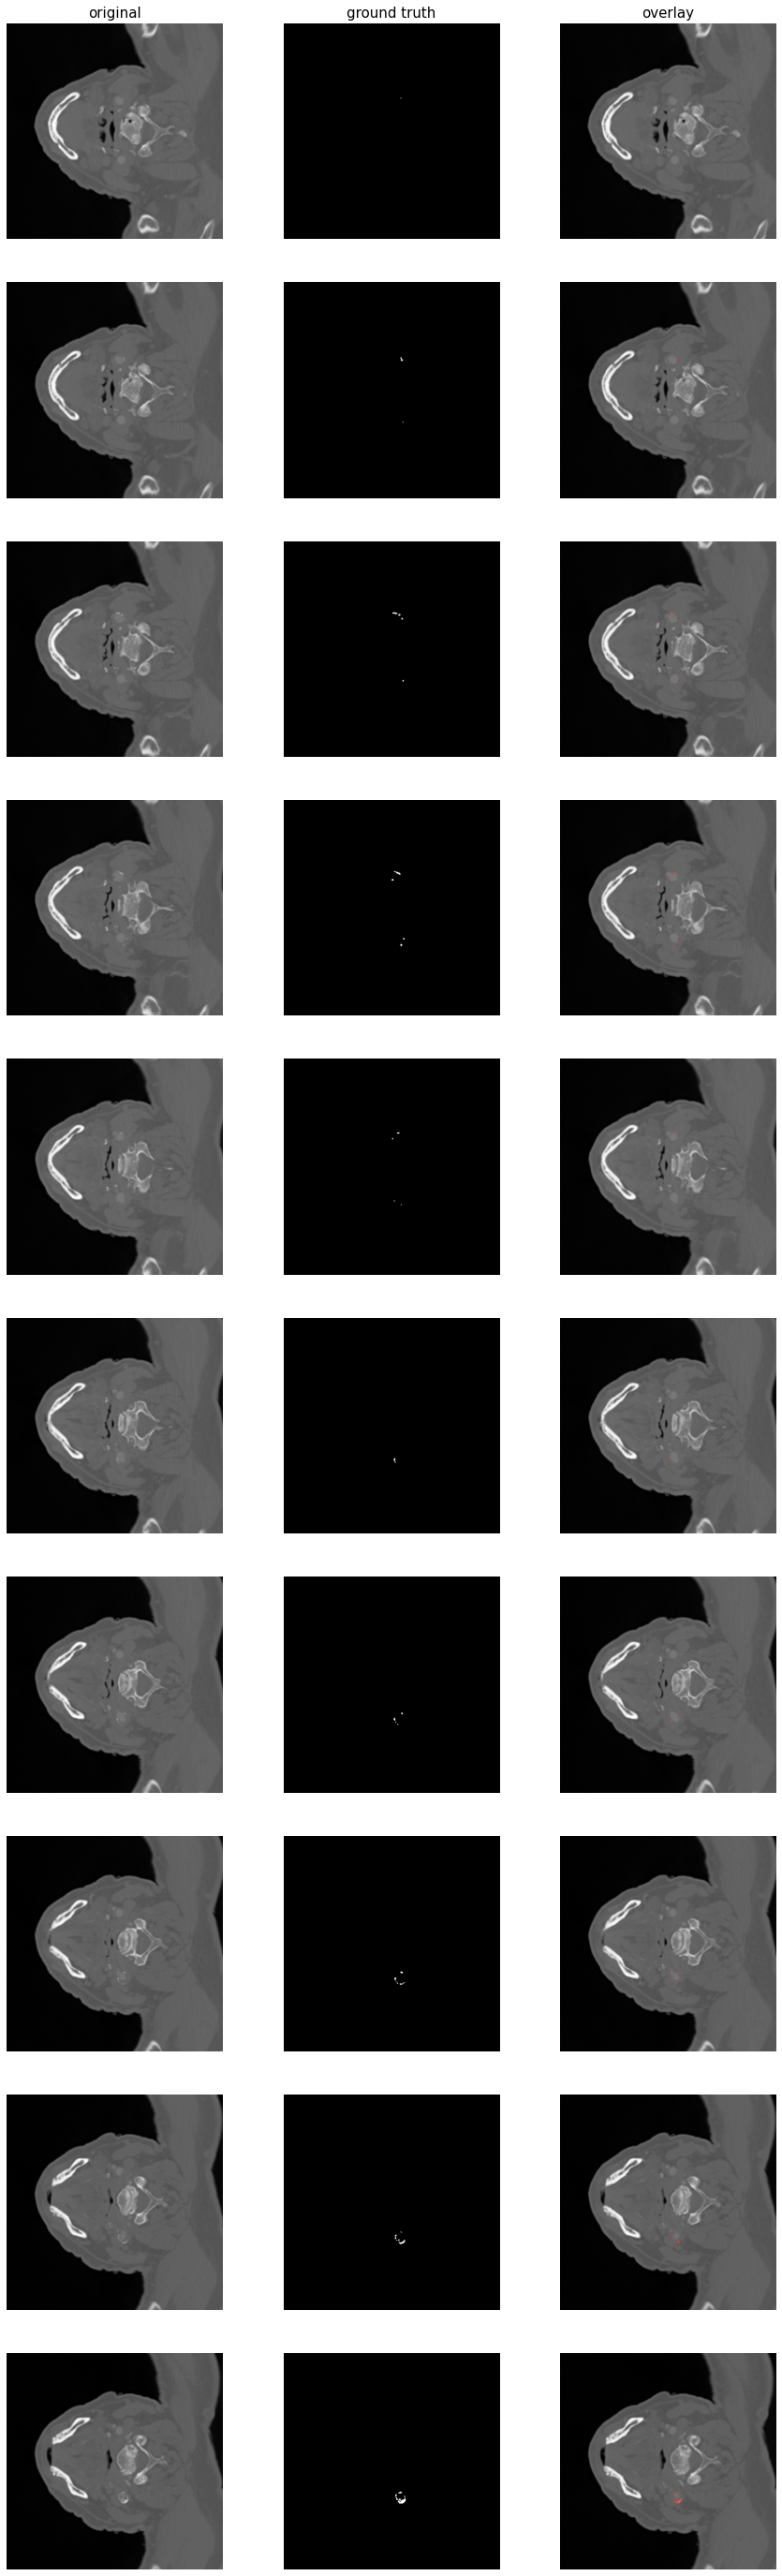

In [13]:
from keras_unet.utils import plot_imgs
plot_imgs(org_imgs=X_train_set, mask_imgs=y_train_set, nm_img_to_plot=10, figsize=5)

In [14]:
train_gen = C.Helper.augment(X_train_set, y_train_set)

In [15]:
model = C.Helper.create_unet(X_train_set[0].shape)

2023-10-04 17:53:38.294902: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:b7:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-10-04 17:53:38.297436: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:bd:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-10-04 17:53:38.307184: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0, 1
2023-10-04 17:53:38.310188: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:b7:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-10-04 17:53:38.312618: I tensorflow/core

In [16]:
model, history = C.Helper.train_unet(train_gen, X_train_set, y_train_set, X_val, y_val, model, epochs=200)

2023-10-04 17:53:42.066733: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-10-04 17:53:42.088755: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245800000 Hz


Epoch 1/200


2023-10-04 17:53:43.323137: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-10-04 17:53:44.204313: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-10-04 17:53:45.314379: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-10-04 17:53:45.314402: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-10-04 17:53:45.314919: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-10-04 17:53:46.373775: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-10-04 17:53:47.499921: I tensorflow/stream_exec

16/16 [==============================] - 165s 7s/step - loss: 0.4250 - iou: 1.5949e-04 - iou_thresholded: 6.7375e-04 - val_loss: 0.0095 - val_iou: 3.1463e-05 - val_iou_thresholded: 0.0018
Epoch 2/200
16/16 [==============================] - 16s 990ms/step - loss: 0.0094 - iou: 4.5991e-04 - iou_thresholded: 6.9000e-04 - val_loss: 0.0039 - val_iou: 3.5056e-04 - val_iou_thresholded: 0.0018
Epoch 3/200
16/16 [==============================] - 16s 991ms/step - loss: 0.0025 - iou: 3.3116e-04 - iou_thresholded: 6.9118e-04 - val_loss: 0.0021 - val_iou: 5.8826e-04 - val_iou_thresholded: 0.0018
Epoch 4/200
16/16 [==============================] - 16s 987ms/step - loss: 0.0020 - iou: 4.1961e-04 - iou_thresholded: 6.9942e-04 - val_loss: 0.0018 - val_iou: 0.0011 - val_iou_thresholded: 0.0018
Epoch 5/200
16/16 [==============================] - 16s 995ms/step - loss: 0.0018 - iou: 4.5390e-04 - iou_thresholded: 7.0510e-04 - val_loss: 0.0016 - val_iou: 8.2977e-04 - val_iou_thresholded: 0.0018
Epoch 6/

16/16 [==============================] - 16s 987ms/step - loss: 4.7734e-04 - iou: 0.2306 - iou_thresholded: 0.3399 - val_loss: 7.5358e-04 - val_iou: 0.1169 - val_iou_thresholded: 0.1294
Epoch 43/200
16/16 [==============================] - 16s 991ms/step - loss: 5.0193e-04 - iou: 0.2271 - iou_thresholded: 0.3163 - val_loss: 7.4280e-04 - val_iou: 0.1132 - val_iou_thresholded: 0.1662
Epoch 44/200
16/16 [==============================] - 16s 987ms/step - loss: 4.7209e-04 - iou: 0.2364 - iou_thresholded: 0.3404 - val_loss: 6.8676e-04 - val_iou: 0.1466 - val_iou_thresholded: 0.1633
Epoch 45/200
16/16 [==============================] - 16s 991ms/step - loss: 4.6079e-04 - iou: 0.2520 - iou_thresholded: 0.3582 - val_loss: 7.3747e-04 - val_iou: 0.1340 - val_iou_thresholded: 0.1463
Epoch 46/200
16/16 [==============================] - 16s 987ms/step - loss: 4.3619e-04 - iou: 0.2725 - iou_thresholded: 0.3817 - val_loss: 7.2857e-04 - val_iou: 0.1491 - val_iou_thresholded: 0.1669
Epoch 47/200
16/16

16/16 [==============================] - 16s 989ms/step - loss: 1.9980e-04 - iou: 0.5379 - iou_thresholded: 0.6503 - val_loss: 0.0011 - val_iou: 0.3235 - val_iou_thresholded: 0.3557
Epoch 84/200
16/16 [==============================] - 16s 986ms/step - loss: 2.2201e-04 - iou: 0.5203 - iou_thresholded: 0.6250 - val_loss: 8.5967e-04 - val_iou: 0.3031 - val_iou_thresholded: 0.3582
Epoch 85/200
16/16 [==============================] - 16s 991ms/step - loss: 2.0515e-04 - iou: 0.5311 - iou_thresholded: 0.6471 - val_loss: 9.9844e-04 - val_iou: 0.3216 - val_iou_thresholded: 0.3752
Epoch 86/200
16/16 [==============================] - 16s 985ms/step - loss: 2.0621e-04 - iou: 0.5321 - iou_thresholded: 0.6417 - val_loss: 0.0013 - val_iou: 0.3026 - val_iou_thresholded: 0.3228
Epoch 87/200
16/16 [==============================] - 16s 990ms/step - loss: 2.0722e-04 - iou: 0.5296 - iou_thresholded: 0.6316 - val_loss: 0.0011 - val_iou: 0.3075 - val_iou_thresholded: 0.3401
Epoch 88/200
16/16 [==========

Epoch 125/200
16/16 [==============================] - 16s 990ms/step - loss: 1.4280e-04 - iou: 0.6332 - iou_thresholded: 0.7291 - val_loss: 0.0021 - val_iou: 0.3352 - val_iou_thresholded: 0.3641
Epoch 126/200
16/16 [==============================] - 16s 985ms/step - loss: 1.3661e-04 - iou: 0.6436 - iou_thresholded: 0.7339 - val_loss: 0.0020 - val_iou: 0.3333 - val_iou_thresholded: 0.3587
Epoch 127/200
16/16 [==============================] - 16s 990ms/step - loss: 1.4132e-04 - iou: 0.6407 - iou_thresholded: 0.7351 - val_loss: 0.0019 - val_iou: 0.3407 - val_iou_thresholded: 0.3605
Epoch 128/200
16/16 [==============================] - 16s 991ms/step - loss: 1.3821e-04 - iou: 0.6449 - iou_thresholded: 0.7361 - val_loss: 0.0014 - val_iou: 0.3234 - val_iou_thresholded: 0.3543
Epoch 129/200
16/16 [==============================] - 16s 988ms/step - loss: 1.4054e-04 - iou: 0.6393 - iou_thresholded: 0.7333 - val_loss: 0.0020 - val_iou: 0.3212 - val_iou_thresholded: 0.3377
Epoch 130/200
16/16 

Epoch 167/200
16/16 [==============================] - 16s 997ms/step - loss: 1.0770e-04 - iou: 0.7027 - iou_thresholded: 0.7826 - val_loss: 0.0024 - val_iou: 0.3332 - val_iou_thresholded: 0.3532
Epoch 168/200
16/16 [==============================] - 16s 987ms/step - loss: 1.0760e-04 - iou: 0.7053 - iou_thresholded: 0.7849 - val_loss: 0.0022 - val_iou: 0.3189 - val_iou_thresholded: 0.3388
Epoch 169/200
16/16 [==============================] - 16s 989ms/step - loss: 1.0968e-04 - iou: 0.6985 - iou_thresholded: 0.7765 - val_loss: 0.0026 - val_iou: 0.3394 - val_iou_thresholded: 0.3638
Epoch 170/200
16/16 [==============================] - 16s 985ms/step - loss: 1.1047e-04 - iou: 0.6937 - iou_thresholded: 0.7805 - val_loss: 0.0021 - val_iou: 0.3234 - val_iou_thresholded: 0.3495
Epoch 171/200
16/16 [==============================] - 16s 987ms/step - loss: 1.1564e-04 - iou: 0.6941 - iou_thresholded: 0.7731 - val_loss: 0.0022 - val_iou: 0.3332 - val_iou_thresholded: 0.3679
Epoch 172/200
16/16 

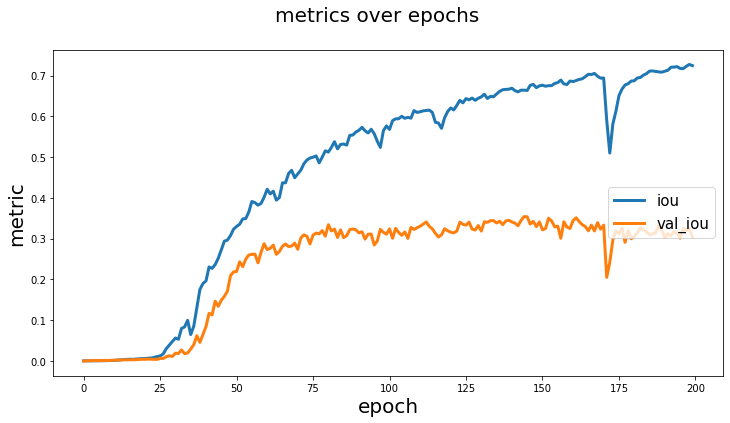

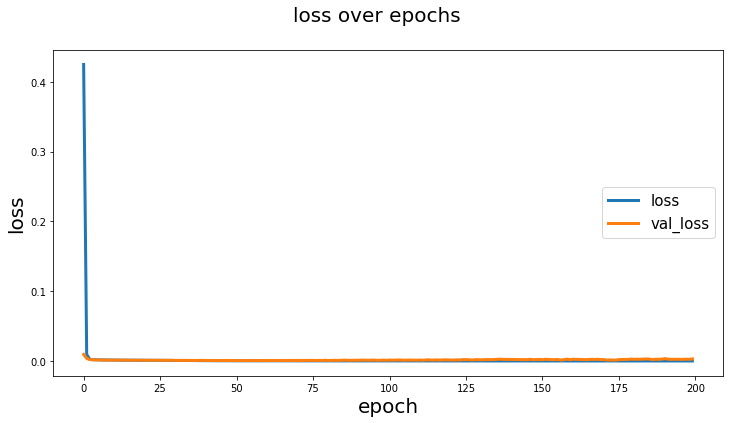

In [17]:
C.Helper.visualize_graph(history)

In [18]:
y_pred = C.Helper.prediction(X_test, model)

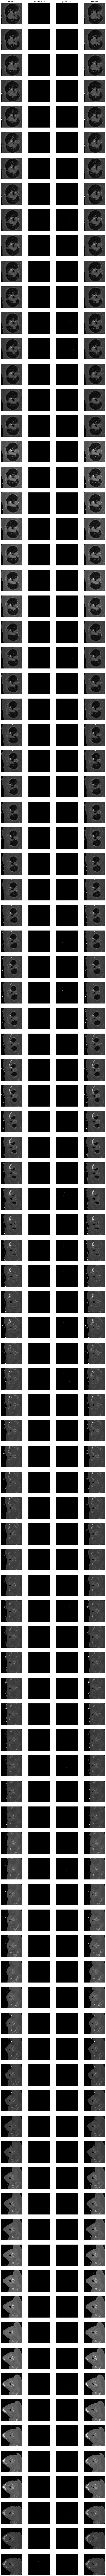

In [19]:
C.Helper.visualize_result(X_test, y_test, y_pred)

In [20]:
C.Helper.evaluate(X_test, y_test, model)

105/105 [==============================] - 23s 223ms/step - loss: 2.3891e-04 - iou: 0.0283 - iou_thresholded: 0.0569
